<a href="https://colab.research.google.com/github/nazalves/proj_data_science/blob/master/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="70%" src="https://github.com/nazalves/dataset_publico/blob/master/Capa_Covid.jpg?raw=true\"></center>

Até o presente momento, observa-se que a maioria dos casos é assintomática e não evolui para forma grave da doença.

Fica evidente que as medidas orientadas pelo Organização Mundial da Saúde, ainda são as mais eficazes para diminuir o ritmo de contágio e o colapso do sistema de saúde. Já temos vacinas já em  fase final de teste, o que aumenta a esperança para um melhor controle da doença.

Com o objetivo de evidenciar os números a respeito do COVID-19 no Brasil, irei realizar uma análise exploratória dos dados públicos disponíveis da doença.

Para este projeto utilizaremos dois conjuntos de dados abertos.

O primeiro conjunto de dados da Covid-19, com os dados de todos os países do mundo foi obtido no site  https://ourworldindata.org/coronavirus, um dos principais sites de pesquisa do mundo de pesquisadores da Universidade de Oxford, atualizado até o dia *01-09-2020*.

O conjunto de dados do Brasil, foram obtidos no site https://brasil.io/home/ mantido por voluntários e que fizeram um trabalho incrível compilando os boletins epidemológicos de 27 Secretarias Estaduais de Saúde, atualizado até o dia 31-08-2020.

In [3]:
# importando bibliotecas necessárias ao projeto

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import seaborn as sns
sns.set(style="darkgrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Instalação da biblioteca bar_chart_race do *Ted Petrou*

In [4]:
#instalar biblioteca para gráfico dinâmico bar_chart_race

!pip install bar_chart_race

     |████████████████████████████████| 163kB 8.3MB/s 


In [5]:
# Instanciando bar_chart_race
import bar_chart_race as bcr

Importando as bases para os *data frames* e já convertendo o campo data (*string*) para o tipo *date* .

In [6]:
df_Brasil = pd.read_csv("https://www.dropbox.com/s/2qg2c9888xujo11/caso_full.csv?dl=1",sep=",", \
                        converters={'last_available_date':pd.to_datetime, 'date':pd.to_datetime})

df_Mundo = pd.read_csv("https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv?raw=true", \
                      converters={'date':pd.to_datetime})

Visualizando os primeiros registros dos dataframe importados.

In [7]:
# 5 primeiros registros do dataframe df_Brasil
df_Brasil.head()


,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,45919049.0,False,False,1,0.00218,2020-02-25,0.0,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,45919049.0,False,False,1,0.00218,2020-02-26,0.0,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0,0,3,city,SP,0,0


In [8]:
# 5 primeiros registros do dataframe df_Mundo
df_Mundo.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,18.733,18.733,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,37.465,18.733,2.676,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29


A pandemia de covid-19, no dataframe (*df_Mundo*) com os dados de todos os países a partir de 31-12-2019 a 31-08-2020 .
Já no dataframe (*df_Brasil*) com dados referente a covid no Basil a partir de 25-02-2020 a 31-08-2020 .

Desta froma faremos as análises até a data de 03-08-2020 no dois conjuntos de dados para uma dequada correlação de data com o conjunto de dados.

In [9]:
print("Menor data - df_Mundo:",df_Mundo.date.min(),'\n')
print("Maior data - df_Mundo:",df_Mundo.date.max(),'\n')

print("Menor data - df_Brasil:",df_Brasil.date.min(),'\n')
print("Maior data - df_Brasil:",df_Brasil.date.max(),'\n')


Menor data - df_Mundo: 2019-12-31 00:00:00 

Maior data - df_Mundo: 2020-09-02 00:00:00 

Menor data - df_Brasil: 2020-02-25 00:00:00 

Maior data - df_Brasil: 2020-08-31 00:00:00 



Visualizando as features dos dois *Dataframe*.

Neste conjunto de dados irei trabalhar com as seguintes features no dataframe *df_Mundo*:

*   *location* - Paises
*   *total_cases* - Total de casos
*   *total_deaths* - Total de Mortes
*   *population* - População
*   *date* - Data de registro

no dataframe *df_Brasil*:

*   *new_deaths* - Paises
*   *new_confirmed* - Total de casos
*   *state* - Total de Mortes
*   *date* - Data de registro

In [10]:
print('\n', '*************** Info do dataframe db_Mundo ***************','\n')
df_Mundo.info()
print('\n','*************** Info do dataframe db_Brasil ***************','\n')
df_Brasil.info()



 *************** Info do dataframe db_Mundo *************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         40923 non-null  object        
 1   continent                        40676 non-null  object        
 2   location                         41170 non-null  object        
 3   date                             41170 non-null  datetime64[ns]
 4   total_cases                      40595 non-null  float64       
 5   new_cases                        40412 non-null  float64       
 6   new_cases_smoothed               39630 non-null  float64       
 7   total_deaths                     40595 non-null  float64       
 8   new_deaths                       40412 non-null  float64       
 9   new_deaths_smoothed              39630 non-null  float64       


Verificação de valores nulos do *Dataframe* do Brasil.



> No caso deste conjunto de dados, a feature *"city"* que representa as cidades do Brasil tem *2,4%* de valores nulos. Neste caso farei a esclusão destas linhas onde a feature apresenta valores nulos.



In [11]:
# Verificando valores nulos do dataframa df_Brasil
print('Valores Null df_Brasil:','\n', (df_Brasil.isnull().sum()/ df_Brasil.shape[0]).sort_values(ascending = False)*100, '\n')


Valores Null df_Brasil: 
 last_available_confirmed_per_100k_inhabitants    2.413205
city                                             0.733733
estimated_population_2019                        0.435536
city_ibge_code                                   0.435536
state                                            0.000000
place_type                                       0.000000
order_for_place                                  0.000000
last_available_deaths                            0.000000
last_available_death_rate                        0.000000
last_available_date                              0.000000
new_confirmed                                    0.000000
last_available_confirmed                         0.000000
is_repeated                                      0.000000
is_last                                          0.000000
epidemiological_week                             0.000000
date                                             0.000000
new_deaths                                    

Retirarando as cidades com valores nulo no dataframe Brasil

In [12]:
# df_Brasil.drop(df_Brasil.loc[df_Brasil.city.isnull() == True].index,axis=0,inplace=True)
df_Brasil.dropna(subset=['city'],inplace=True)
df_Brasil.loc[df_Brasil.city.isnull() == True].count()

city                                             0
city_ibge_code                                   0
date                                             0
epidemiological_week                             0
estimated_population_2019                        0
is_last                                          0
is_repeated                                      0
last_available_confirmed                         0
last_available_confirmed_per_100k_inhabitants    0
last_available_date                              0
last_available_death_rate                        0
last_available_deaths                            0
order_for_place                                  0
place_type                                       0
state                                            0
new_confirmed                                    0
new_deaths                                       0
dtype: int64

Verificação de valores nulos do *Dataframe* do Mundo.



> No caso deste conjunto de dados, várias features apresentam valores nulos e em percentuais significativos do total de linhas. A feature "*new_tests*" tem mais 67% das informações ausentes. Porém estas features não serão alvo da análise que será realizada nestes dados.




In [13]:
# Verificando valores nulos do dataframa df_Brasil
print('Valores Null df_Mundo:','\n',(df_Mundo.isnull().sum()/ df_Mundo.shape[0]).sort_values(ascending = False)*100)

Valores Null df_Mundo: 
 new_tests_per_thousand             67.726500
new_tests                          67.726500
total_tests                        66.929803
total_tests_per_thousand           66.929803
tests_per_case                     66.439155
positive_rate                      65.555016
new_tests_smoothed                 63.689580
new_tests_smoothed_per_thousand    63.689580
tests_units                        61.855720
handwashing_facilities             58.491620
extreme_poverty                    41.114889
male_smokers                       30.553801
female_smokers                     29.676949
hospital_beds_per_thousand         19.106145
stringency_index                   16.898227
aged_65_older                      12.020889
gdp_per_capita                     11.821715
aged_70_older                      11.168326
median_age                         10.706825
cardiovasc_death_rate              10.675249
diabetes_prevalence                 7.561331
population_density            

Relação dos 10 países mais populosos em *milhões* de habitantes. E depois vamos comparar com os 10 países com maior números de casos e morte pela Covid-19.

O Brasil tem hoje a *sexta* maior população do mundo.

Podemos ver que a evolução da Covid-19 não está diretamente correlacionada ao tamanho da população.



> Os *Estados Unidos* tem a *terceira maior* população do mundo, mas é o **primeiro** em número de casos e mortes.

> O *Brasil* tema *sexta maior* população mas é o **segundo** em número de casos e mortes.

> *Estado Unidos e Brasil* juntos representam mais de **35% do total** de casos de Covid-19 e tem juntos aproximadamente **7%** da população mundial.

In [14]:
Total_Populacao_Mundo = df_Mundo.population.max()
Total_Casos_Mundo = df_Mundo.total_cases.max()
Total_Mortes_Mundo = df_Mundo.total_deaths.max()

df_Total = df_Mundo.loc[(df_Mundo.date == '2020-08-31') & (df_Mundo.location != "World") , ['location',"total_cases","total_deaths","population"]].\
                     sort_values(by='total_deaths', ascending = False)[:10]

df_Total = df_Total.rename(columns={'location':'Paises','total_cases':'Total de Casos','total_deaths':'Total de Mortes','population':'Pop.(milhoes hab)'})
df_Total['Perc_Participacao'] =  df_Total['Total de Mortes']*100 / Total_Mortes_Mundo
df_Total['Pop.(milhoes hab)'] = df_Total['Pop.(milhoes hab)'] / 1000000
df_Total.reset_index(drop=True)                                

,Paises,Total de Casos,Total de Mortes,Pop.(milhoes hab),Perc_Participacao
0,United States,5997163.0,183069.0,331.002647,21.350449
1,Brazil,3862311.0,120828.0,212.559409,14.091583
2,India,3621245.0,64469.0,1380.004385,7.518707
3,Mexico,595841.0,64158.0,128.932753,7.482436
4,United Kingdom,334467.0,41499.0,67.886004,4.839827
5,Italy,268218.0,35477.0,60.461828,4.137510
6,France,277943.0,30606.0,65.273512,3.569429
7,Spain,462858.0,29094.0,46.754783,3.393092
8,Peru,647166.0,28788.0,32.971846,3.357405
9,Iran,373570.0,21462.0,83.992953,2.503009


In [15]:
mais_populosos = df_Mundo.loc[(df_Mundo.location != 'World') & (df_Mundo.date == '2020-08-31'),\
             ["location","population"]].sort_values(by='population', ascending = False)[:10]

mais_populosos['Perc_Populacao'] = mais_populosos.population * 100 / (df_Mundo.population.max())
mais_populosos.population = round(mais_populosos.population / 1000000,2)
mais_populosos = mais_populosos.rename(columns={'location': 'Paises', 'population':'Pop.(milhões de hab.)'})
mais_populosos[["Paises","Pop.(milhões de hab.)","Perc_Populacao"]].reset_index( drop=True)                 
                

,Paises,Pop.(milhões de hab.),Perc_Populacao
0,China,1439.32,18.465182
1,India,1380.00,17.704170
2,United States,331.00,4.246455
3,Indonesia,273.52,3.509053
4,Pakistan,220.89,2.833843
5,Brazil,212.56,2.726939
6,Nigeria,206.14,2.644579
7,Bangladesh,164.69,2.112811
8,Russia,145.93,1.872203
9,Mexico,128.93,1.654087


Gráfico race


In [16]:
#Criando dataframe para gráfico race de barras
df_Mundo_bcr = df_Mundo.loc[(df_Mundo.date >= '2020-03-15') & \
                            (df_Mundo.location.isin(['Brazil','United States','United Kingdom','Mexico','India','Italy']))].\
groupby(['location','date']).max()['total_deaths'].unstack().T


In [19]:
bcr.bar_chart_race(df_Mundo_bcr)

Visão global dos 6 maiores países em número total de casos e mortes no mundo da Covid-19.

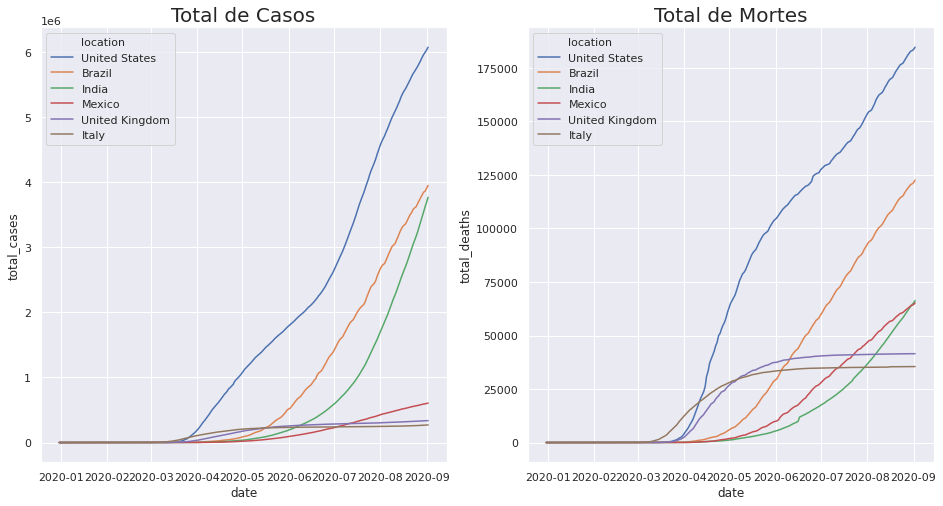

In [17]:

fig, ax =plt.subplots(1,2,figsize=(16,8))
sns.set_style = 'darkgrid'


df_grafico = df_Mundo.loc[(df_Mundo.location.isin(['Brazil','United States','United Kingdom','Mexico','India','Italy'])), ['location',"date","total_cases"]].reset_index(drop=True). \
                      sort_values(by='total_cases', ascending = False)
               

df_grafico2 = df_Mundo.loc[(df_Mundo.location.isin(['Brazil','United States','United Kingdom','Mexico','India','Italy'])), ['location',"date","total_deaths"]].reset_index(drop=True). \
                      sort_values(by='total_deaths', ascending = False)

g = sns.lineplot(x='date',y='total_cases', hue="location", data=df_grafico, ax=ax[0])
ax[0].set_title('Total de Casos', fontsize = 20)  
h = sns.lineplot(x='date',y='total_deaths', hue="location", data=df_grafico2, ax=ax[1])
ax[1].set_title('Total de Mortes', fontsize = 20) 
;
g.figure.autofmt_xdate;




Criação de features com o número de casos e mortes acumulados por dia no dataframe *df_Brasil* .

In [18]:
df_Brasil['Acum_mortes'] = df_Brasil.new_deaths.cumsum()
df_Brasil['Acum_casos'] = df_Brasil.new_confirmed.cumsum()

In [31]:
#df_Brasil.Acum_mortes.max()
df_Estados = df_Brasil.loc[(df_Brasil.date >= '20200301')].groupby([df_Brasil.date.dt.to_period("M"),df_Brasil.state]).\
agg({'new_deaths':np.sum,'new_confirmed':np.sum,'Acum_mortes':np.max}).reset_index()

Conversão da variável *date* como tipo númerico no dataframe df_Estados

In [32]:
df_Estados['date'] = df_Estados.date.dt.month

In [34]:
# Verificacao das features do dataframe e se a conversão foi realizada com sucesso
df_Estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           162 non-null    int64 
 1   state          162 non-null    object
 2   new_deaths     162 non-null    int64 
 3   new_confirmed  162 non-null    int64 
 4   Acum_mortes    162 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.5+ KB


In [60]:
# dataframe para geração do gráfico
df_grafico_est = df_Estados.groupby([df_Estados.state]).agg({"new_deaths":np.sum,"new_confirmed":np.sum}).sort_values(by="new_confirmed", ascending=False).reset_index()

Gráfico exibe o total de casos e mortes nos estados do Brasil, onde temos uma concentração maior na região sudeste. O total de casos no brasil até a data de coleta destes dados eram de ***3.826.502 casos confirmados e 120.102 mortes***.

A região sudeste tem os seguintes números:



*   Total de Casos: **1.348.081** - *35% do Total de casos no Brasil*
*   Total de mortes: **54.316** - *45% do Total de Mortos*




In [91]:
print('Total de Casos Brasil:',df_grafico_est.new_confirmed.sum(),'\n')
print('Total de Mortes Brasil:',df_grafico_est.new_deaths.sum(),'\n')
print('Total de Mortes - Região Sudeste:',df_grafico_est.loc[(df_grafico_est.state.isin(['SP','MG','RJ','ES']))].new_deaths.sum(),'\n')
print('Total de Casos - Região Sudeste:',df_grafico_est.loc[(df_grafico_est.state.isin(['SP','MG','RJ','ES']))].new_confirmed.sum(),'\n')
print('% de Mortes - Região Sudeste:',df_grafico_est.loc[(df_grafico_est.state.isin(['SP','MG','RJ','ES']))].new_deaths.sum() \
      /df_grafico_est.new_deaths.sum(), '\n')
print('% de Casos - Região Sudeste:',df_grafico_est.loc[(df_grafico_est.state.isin(['SP','MG','RJ','ES']))].new_confirmed.sum() \
      /df_grafico_est.new_confirmed.sum(),'\n' )


Total de Casos Brasil: 3826502 

Total de Mortes Brasil: 120102 

Total de Mortes - Região Sudeste: 54316 

Total de Casos - Região Sudeste: 1348081 

% de Mortes - Região Sudeste: 0.452248921749846 

% de Casos - Região Sudeste: 0.35230113560635795 



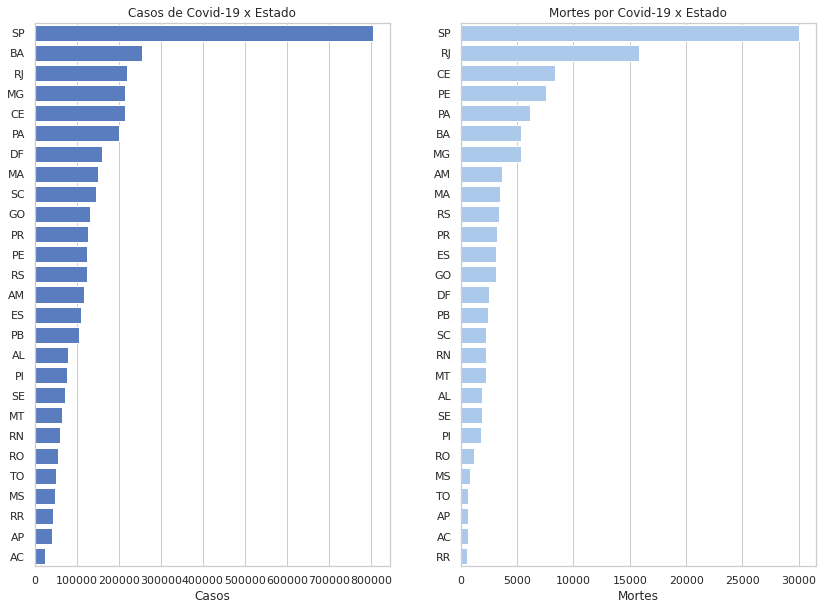

In [92]:
sns.set(style="whitegrid")
f, ax = plt.subplots(ncols = 2,figsize=(14, 10))

sns.set_color_codes("muted")
sns.barplot(x="new_confirmed",y="state",data=df_grafico_est,color="b",label="Casos",ax=ax[0])

ax[0].set( ylabel="", xlabel="Casos")
ax[0].set_title ('Casos de Covid-19 x Estado')
sns.set_color_codes("pastel")
sns.barplot(x="new_deaths",y="state",data=df_grafico_est.sort_values(by="new_deaths",ascending=False),color="b",label="Mortes",ax=ax[1])

ax[1].set( ylabel="", xlabel="Mortes")
ax[1].set_title ('Mortes por Covid-19 x Estado') ;

## Conclusão

De acordo com os números obtidos nesta análise do desenvovimento da Covid-19 no Brasil, podemos perceber que a doença foi niglegenciada no início, muita desiformação e o conflito entre "crise econômica" e "crise de saúde". Se as orientações de isolamento social, higiene das mãos e máscaras, tivessem sido aderidas pela população, além do controle dos governos sobre estas medidas, certamente poderíamos terminimizado os mais de ***3.826.502 de casos*** e mais de ***120.000 mortes*** .

A Covid-19 serviu também para mostrar que nosso Sistema Único de Saúde o SUS, é um dos melhores do mundo e sem ele certamente a situação estaria muito pior. Mas também ressaltou as desigualdades sociais, pois os que tem dificulade de acesso a saúde, dependem da ajuda emergencial do governo, da educação pública são os maiores atingidos por esta pandemia.

A velocidade de contaminação está caindo, mais ainda temos um bom caminho para vencermos esta doença.